<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp25-notes/blob/main/Day13_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day12
## Random Forests

#### CS167: Machine Learning, Spring 2025


📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp25/cs167_syllabus_sp25.pdf)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/cs167_sp25/datasets/breast-cancer-wisconsin-data.csv'
data= pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop('Unnamed: 32', inplace=True, axis=1)
data.isna().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


# 💪🏻 Warm-Up Exercise:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

target = "diagnosis"
predictors = data.columns.drop(target) #gets all of the columns except the target

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
print('Target column unique values: ', data[target].unique()) # M: Malignant and B: Benign

Target column unique values:  ['M' 'B']


Finish the rest.

You can look up the notebook for reference [Day 12: Scikit Learn Library](https://github.com/alimoorreza/CS167-fall24-notes/blob/main/Day12_Scikit_Learn_Practice.ipynb).

In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 1: Build a Decision Tree
dt = DecisionTreeClassifier()

# Step 2: Normalize your data
'''
scaler          = StandardScaler()
...
...
'''

# Step 3: Try using a decision tree on your normalized data
'''
dt.fit(...)
prediction = dt.predict(...)
'''

# Step 4: Print out the confusion matrix for your model
'''
acc = accuracy_score(test_sln, prediction)
print(acc)
'''

0.9473684210526315


# ✨ New Material

# Ensemble Learning

__Ensemble Learning__: using multiple learners/hypotheses for coming up with predictions - often performs better than using one algorithm alone
- Like crowdsourcing different machine learning models to come up with a consensus


# Random Forests

__Big Idea__: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24/notes/images/day06_rf1.png" width=500/>
</div>


# Random Forests

__Random Forests__ are an effective learning algorithm that uses an ensemble of decision trees.


__Basic idea__: build a bunch of decision trees and have them vote on the prediction

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall24/notes/images/day06_rf2.png" width=600/>
</div>

## How to create different trees?

The power of a diverse portfolio:
- Just like how we want investments (e.g. stock portfolios) to be diverse…
- Low correlation amongst investments cause stability and reliability
    - Don’t put all of your money in one industry
    
    
__Uncorrelated models__ can produce ensemble predictions that are more accurate than any of the individual predictions
- As long as the trees don’t consistently err in the same direction


## What Random Forests Need:

There needs to be some actual signal in our features so that models built using those features do better than random guessing.

The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.
- Need to set up the trees so they all don’t make the same mistakes


How can we do this?
- Introduce some randomness…
    - how the trees are split
    - what data is used for the training sets

# Random Forest: Big Picture

In our random forest, we end up with trees that are not only trained on __different sets of data__ (thanks to bagging) but also use __different features__ to make decisions.

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models


# Questions to Consider

- How many trees (often called $B$) to generate in the forest?
- How large should $m$ be? (the number of features to use in each tree)
- These are parameters in the algorithm that need to be tuned for each dataset for optimal performance.

## 💬 Discussion Question

When is it better to use a single decision tree instead of a random forest?

# Insights:

Some people will say 'random forests cannot overfit'
- what they mean: increaing the number o trees, $B$, doesn't cause overfitting
- the depth of each tree is a parameter that can be tuned for the forest

According to ESLII*, Random Forest does poorly with small feature subsets when there are lots of irrelevant features

>ESLII = Elements of Statistical Learning by Trevor Hastie

# Alright, let's jump into some code:

Start by downloading the `breast-cancer-wisconsin-data.csv` file from Blackboard and putting it in your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/cs167_fall24/datasets/breast-cancer-wisconsin-data.csv'
data= pd.read_csv(path)
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Notice that the 'Unnamed: 32' column is full of NaN... we need to get rid of it.
data.drop('Unnamed: 32', inplace=True, axis=1)
data.isna().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

target = "diagnosis"
predictors = data.columns.drop(target) #gets all of the columns except the target

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

In [ ]:
from sklearn import tree
from sklearn import metrics

# Let's use a single tree for comparison
# a default Decision Tree Classifier

dt = tree.DecisionTreeClassifier()
dt.fit(train_data,train_sln)
predictions = dt.predict(test_data)

print("accuracy score: ", metrics.accuracy_score(test_sln,predictions))
vals = data[target].unique() ## possible classification values (M = malignant; B = benign)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

accuracy score:  0.9385964912280702
        Predicted M  Predicted B
True M           38            2
True B            5           69


In [ ]:
# a Random Forest Classifier
forest = RandomForestClassifier(n_estimators = 200, random_state = 0)
forest.fit(train_data,train_sln)
predictions = forest.predict(test_data)
print("accuracy score: ", metrics.accuracy_score(test_sln,predictions))

vals = data[target].unique() ## possible classification values (M = malignant; B = benign)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "True " + vals, columns = "Predicted " + vals))

accuracy score:  0.9824561403508771
        Predicted M  Predicted B
True M           40            0
True B            2           72


# Group Exercise #1:

Look at [RandomForestClassifer Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. What is the default number of trees?
2. How does increasing or decreasing the number of trees affect accuracy?
3. What is the parameter to change to affect the number of features used?
4. How does increasing or decreasing the number of features affect accuracy?




# Group Exercise #2:
Can you improve upon the Breast cancer diagnosis accuracy?

Can you get 100% accuracy? Why do you think so?





# Feature Importances
Because we are building so many small decision trees in a random forest, we have the added benefit of being able to see what features are most commonly used as high information gain features. The code below shows how we can plot the 'Feature Importance' chart for a random forest.

In this particular run, it looks like __fractal_dimension_worst__ and __symmetry_worst__ were the two most important features, but there were a handful of others that were important as well.

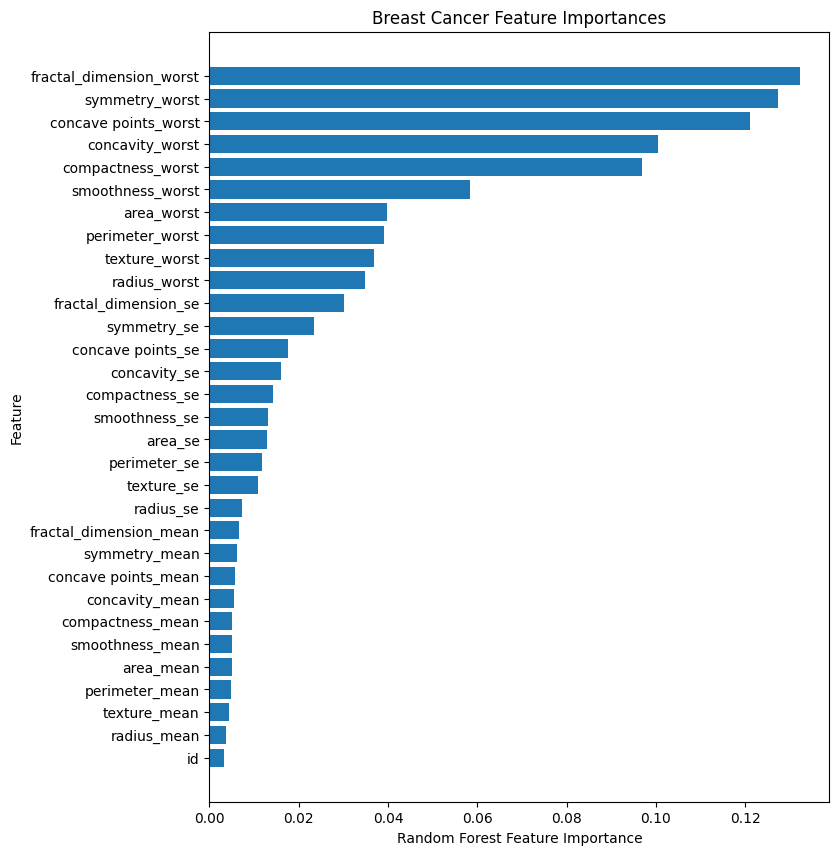

In [ ]:
# It looks like our random forest model achieved pretty good accuracy.
# Now lets check how important each of the features was in the ensemble of models we built.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#creates a list of numbers the right size to use as the index
#and sorts the list so that the most important feature are first
index = range(len(predictors))
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.title('Breast Cancer Feature Importances')
plt.barh(range(len(sorted_indices)),importances[sorted_indices],height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

# 🌳 Tuning our Forest:

How can we tell how many trees to use?

What about how many features to include in our trees?

We can __tune__ our random forest to find the best values of model parameters:

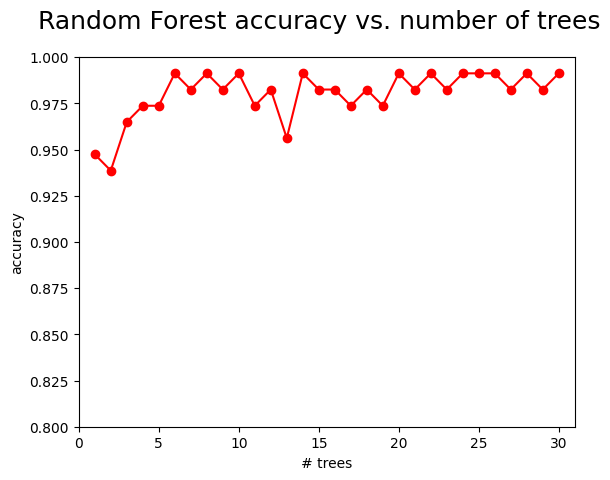

In [ ]:
#This function just loops through a series of n_estimator values, builds a different model
#for each, and then plots their respective accuracies. By making it a function, it's easier
#to try out different ranges of numbers
import matplotlib.pyplot as plt

def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n, random_state=41)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,.8,1])

    plt.show()

tune_number_of_trees(range(1,31))

It looks like whether we are using small numbers of trees or large ones, the accuracy stays about the same. It appears at least sometimes that Random Forest doesn't take a lot of tuning of the number of trees.

Now let's try tuning the number of features used with each tree.

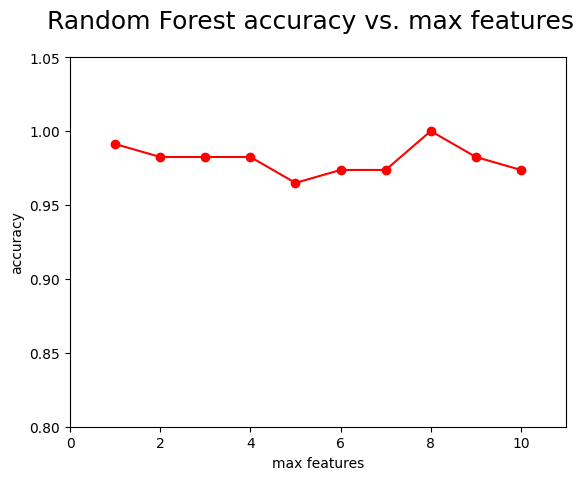

In [ ]:
def tune_max_features(max_features_values):
    rf_accuracies = []

    for m in max_features_values:

        curr_rf = RandomForestClassifier(n_estimators=10,max_features=m, random_state=31)
        curr_rf.fit(train_data,train_sln)
        curr_predictions = curr_rf.predict(test_data)
        curr_accuracy = metrics.accuracy_score(test_sln,curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,rf_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,.8,1.05])

    plt.show()

tune_max_features(range(1,11))

Note that the above could be subject to changes based on the initial random_state.

For this data, which is apparently very easy to learn on (accuracy is very high), the number of features used with each tree also didn't matter much when used with an ensemble of 10 trees. This is probably something worth tuning if you have a lot of features, especially if many of them might not be very relevant.

# Exercise #3

Apply random forest to the wine dataset `winequality-white.csv` from [Notebook #3](https://github.com/alimoorreza/CS167-Fall24-Notebook-3)

- Can you get an $R^2$ score above .575 using `RandomForestRegressor(random_state=31)` (and other arguments)?

In [ ]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split

path = '/content/drive/MyDrive/cs167_fall24/datasets/winequality-white.csv' # available in the "Datasets" section of the blackboard
wines = pd.read_csv(path)
target = 'quality'
#predictors= data.columns.drop('quality')
predictors = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH','sulphates', 'alcohol']
train_data, test_data, train_sln, test_sln = train_test_split(wines[predictors], wines[target], test_size = 0.2, random_state=41)
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.70
728,6.4,0.57,0.02,1.8,0.067,4.0,11.0,0.99700,3.46,0.68,9.50
1366,7.3,0.74,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.80
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.10
1456,6.0,0.54,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55


In [ ]:
#your code here